In [65]:
import pandas as pd

In [66]:
players=pd.read_csv("playerAttributes.csv")
players.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [67]:
players.drop(['Unnamed: 0','ID','Name','Age','Photo','Nationality','Flag','Potential','Club','Club Logo','Value','Wage','Special',
       'Preferred Foot', 'International Reputation','Weak Foot',
       'Skill Moves','Work Rate','Body Type','Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],axis=1,inplace=True)
players.head()

,Overall,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,92,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,91,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,91,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [68]:
len(players)

18207

In [69]:
players.dropna(inplace=True)

In [70]:
len(players)

18147

In [71]:
#Test Code
import re
index=4
testConv=players.loc[index]['Height']
#testConv_search=re.search('\"(.)\'(.*)\"',testConv)
testConv_search=re.search('(.).(.*)',testConv)
feet=testConv_search.group(1)
inches=testConv_search.group(2)
feet=int(feet,10)
inches=int(inches,10)

height=(feet*12)+inches
height=height/39.37

height
#Test Code

1.8034036068072137

In [72]:
players['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [73]:
for index,row in players.iterrows():
    conv=players.loc[index]['Height']
    conv_search=re.search('(.).(.*)',conv)
    feet=int(conv_search.group(1))
    inches=int(conv_search.group(2))
    players.at[index,'Height']=((feet*12)+inches)/39.37
    
players.head()

,Overall,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94,RF,1.7018,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94,ST,1.8796,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,92,LW,1.7526,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,91,GK,1.9304,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,91,RCM,1.8034,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [74]:
import re
index=4
testConv=players.loc[index]['Weight']
#testConv_search=re.search('\"(.)\'(.*)\"',testConv)
testConv_search=re.search('(.*)lbs',testConv)
feet=testConv_search.group(1)
feet

'154'

In [75]:
for index,row in players.iterrows():
    conv=players.loc[index]['Weight']
    conv_search=re.search('(.*)lbs',conv)
    pounds=int(conv_search.group(1))
    players.at[index,'Weight']=pounds/2.205
    
players.head()

,Overall,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,94,RF,1.7018,72.1088,84.0,95.0,70.0,90.0,86.0,97.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94,ST,1.8796,82.9932,84.0,94.0,89.0,81.0,87.0,88.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,92,LW,1.7526,68.0272,79.0,87.0,62.0,84.0,84.0,96.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,91,GK,1.9304,76.1905,17.0,13.0,21.0,50.0,13.0,18.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,91,RCM,1.8034,69.8413,93.0,82.0,55.0,92.0,82.0,86.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [76]:
players['bmi']=0
for index,row in players.iterrows():
    players.at[index,'bmi']=players.loc[index]['Weight']/(players.loc[index]['Height']*players.loc[index]['Height'])
    
players.head()

,Overall,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,bmi
0,94,RF,1.7018,72.1088,84.0,95.0,70.0,90.0,86.0,97.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,24
1,94,ST,1.8796,82.9932,84.0,94.0,89.0,81.0,87.0,88.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,23
2,92,LW,1.7526,68.0272,79.0,87.0,62.0,84.0,84.0,96.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22
3,91,GK,1.9304,76.1905,17.0,13.0,21.0,50.0,13.0,18.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,20
4,91,RCM,1.8034,69.8413,93.0,82.0,55.0,92.0,82.0,86.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,21


In [77]:
sorted(players['bmi'].unique().tolist())

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 34]

#### BMI Categories:
#### <18.5 : Underweight
#### 18.5 to 25 : Normal
#### 25-30 : Overweight
#### >30 : Obese

In [78]:
playerBMIs=players[['bmi']].copy()
playerBMIs.head()

,bmi
0,24
1,23
2,22
3,20
4,21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295EE4D67B8>]],
      dtype=object)

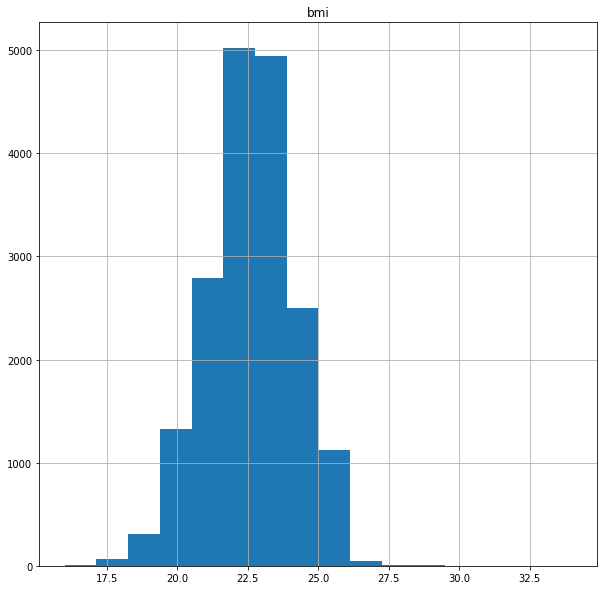

In [79]:
playerBMIs.hist(figsize=(10,10),bins=16)

In [80]:
playerBMIs['bmi'].unique()

array([24, 23, 22, 20, 21, 25, 26, 19, 18, 27, 28, 29, 17, 30, 34, 16],
      dtype=int64)

In [81]:
forChart=playerBMIs['bmi'].value_counts().sort_index()
forChart

16       2
17       7
18      67
19     304
20    1324
21    2789
22    5021
23    4942
24    2505
25     908
26     212
27      47
28      12
29       5
30       1
34       1
Name: bmi, dtype: int64

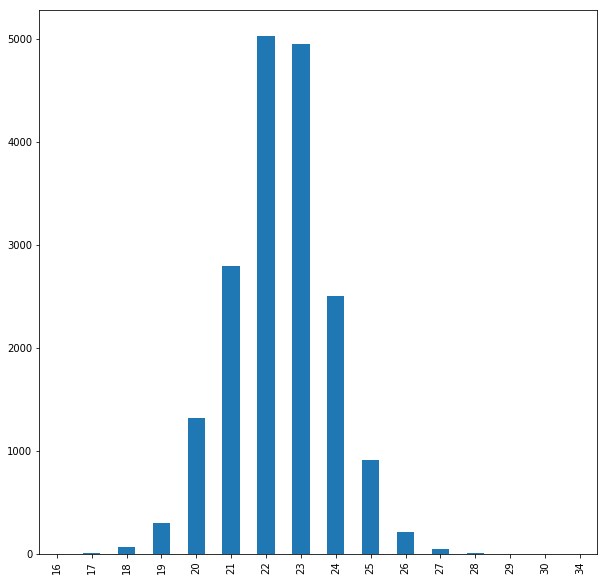

In [82]:
forChart.plot.bar(figsize=(10,10))

In [83]:
#Displaying average BMI of the ~18000 professional players
playerBMIs['bmi'].describe()

count    18147.000000
mean        22.397972
std          1.444286
min         16.000000
25%         22.000000
50%         22.000000
75%         23.000000
max         34.000000
Name: bmi, dtype: float64

### BMI distribution in relation to overall rating

In [84]:
players.head()

,Overall,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,bmi
0,94,RF,1.7018,72.1088,84.0,95.0,70.0,90.0,86.0,97.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,24
1,94,ST,1.8796,82.9932,84.0,94.0,89.0,81.0,87.0,88.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,23
2,92,LW,1.7526,68.0272,79.0,87.0,62.0,84.0,84.0,96.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22
3,91,GK,1.9304,76.1905,17.0,13.0,21.0,50.0,13.0,18.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,20
4,91,RCM,1.8034,69.8413,93.0,82.0,55.0,92.0,82.0,86.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,21


In [85]:
tempPlayers=players[['Overall','bmi']].copy()
tempPlayers.head()

,Overall,bmi
0,94,24
1,94,23
2,92,22
3,91,20
4,91,21


In [86]:
tempPlayers.loc[(tempPlayers['Overall']>90)]['bmi'].describe()

count     9.000000
mean     22.777778
std       1.641476
min      20.000000
25%      22.000000
50%      23.000000
75%      24.000000
max      25.000000
Name: bmi, dtype: float64

In [87]:
tempPlayers.loc[(tempPlayers['Overall']>85) & (tempPlayers['Overall']<=90)]['bmi'].describe()

count    68.000000
mean     23.058824
std       1.244479
min      20.000000
25%      22.000000
50%      23.000000
75%      24.000000
max      26.000000
Name: bmi, dtype: float64

In [88]:
tempPlayers.loc[(tempPlayers['Overall']>80) & (tempPlayers['Overall']<=85)]['bmi'].describe()

count    335.000000
mean      22.585075
std        1.419840
min       19.000000
25%       22.000000
50%       23.000000
75%       24.000000
max       26.000000
Name: bmi, dtype: float64

In [89]:
tempPlayers.loc[(tempPlayers['Overall']>75) & (tempPlayers['Overall']<=80)]['bmi'].describe()

count    1159.000000
mean       22.761001
std         1.360940
min        18.000000
25%        22.000000
50%        23.000000
75%        24.000000
max        29.000000
Name: bmi, dtype: float64

In [90]:
tempPlayers.loc[(tempPlayers['Overall']>70) & (tempPlayers['Overall']<=75)]['bmi'].describe()

count    3178.000000
mean       22.637508
std         1.403535
min        17.000000
25%        22.000000
50%        23.000000
75%        24.000000
max        29.000000
Name: bmi, dtype: float64

In [91]:
tempPlayers.loc[(tempPlayers['Overall']<=70)]['bmi'].describe()

count    13398.000000
mean        22.301463
std          1.449490
min         16.000000
25%         21.000000
50%         22.000000
75%         23.000000
max         34.000000
Name: bmi, dtype: float64

### Position and BMI Analyzer - All Players

In [92]:
tempPlayers=players[['Position','bmi']].copy()
tempPlayers.head()

,Position,bmi
0,RF,24
1,ST,23
2,LW,22
3,GK,20
4,RCM,21


In [93]:
tempPlayers['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [94]:
tempPlayers.loc[(tempPlayers['Position']=='GK')]['bmi'].describe()

count    2025.000000
mean       22.637037
std         1.540017
min        16.000000
25%        22.000000
50%        23.000000
75%        24.000000
max        29.000000
Name: bmi, dtype: float64

In [95]:
tempPlayers.loc[(tempPlayers['Position']=='ST') | \
                (tempPlayers['Position']=='LS') | (tempPlayers['Position']=='RS') | \
                (tempPlayers['Position']=='LF') | (tempPlayers['Position']=='RF') | \
                (tempPlayers['Position']=='CF')]['bmi'].describe()

count    2667.000000
mean       22.569179
std         1.504181
min        17.000000
25%        22.000000
50%        23.000000
75%        23.000000
max        34.000000
Name: bmi, dtype: float64

In [96]:
tempPlayers.loc[(tempPlayers['Position']=='CB') | \
                (tempPlayers['Position']=='RCB') | (tempPlayers['Position']=='LCB')] \
                ['bmi'].describe()

count    3088.000000
mean       22.483484
std         1.411824
min        16.000000
25%        22.000000
50%        23.000000
75%        23.000000
max        29.000000
Name: bmi, dtype: float64

In [97]:
tempPlayers.loc[(tempPlayers['Position']=='LB') | \
                (tempPlayers['Position']=='RB') | (tempPlayers['Position']=='LWB') |\
                (tempPlayers['Position']=='RWB')]['bmi'].describe()

count    2778.000000
mean       22.354212
std         1.388187
min        17.000000
25%        22.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: bmi, dtype: float64

In [98]:
tempPlayers.loc[(tempPlayers['Position']=='CM') | \
                (tempPlayers['Position']=='LCM') | (tempPlayers['Position']=='RCM') |\
                (tempPlayers['Position']=='LAM') | (tempPlayers['Position']=='RAM') |\
                (tempPlayers['Position']=='CAM')]['bmi'].describe()

count    3180.000000
mean       22.199686
std         1.404191
min        18.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        28.000000
Name: bmi, dtype: float64

In [99]:
tempPlayers.loc[(tempPlayers['Position']=='LM') | \
                (tempPlayers['Position']=='RM') | (tempPlayers['Position']=='RW') |\
                (tempPlayers['Position']=='LW')]['bmi'].describe()

count    2970.000000
mean       22.240404
std         1.433416
min        17.000000
25%        21.000000
50%        22.000000
75%        23.000000
max        29.000000
Name: bmi, dtype: float64

In [100]:
tempPlayers.loc[(tempPlayers['Position']=='CDM') | \
               (tempPlayers['Position']=='LDM') | (tempPlayers['Position']=='RDM') \
               ]['bmi'].describe()

count    1439.000000
mean       22.408617
std         1.376773
min        18.000000
25%        22.000000
50%        22.000000
75%        23.000000
max        27.000000
Name: bmi, dtype: float64

### Position BMI - Analyzer (Top Players) 85-100

In [101]:
tempPlayers=players.loc[(players['Overall'] >= 85)]
tempPlayers.head()

,Overall,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,bmi
0,94,RF,1.7018,72.1088,84.0,95.0,70.0,90.0,86.0,97.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,24
1,94,ST,1.8796,82.9932,84.0,94.0,89.0,81.0,87.0,88.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,23
2,92,LW,1.7526,68.0272,79.0,87.0,62.0,84.0,84.0,96.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22
3,91,GK,1.9304,76.1905,17.0,13.0,21.0,50.0,13.0,18.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,20
4,91,RCM,1.8034,69.8413,93.0,82.0,55.0,92.0,82.0,86.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,21


In [102]:
tempPlayers=tempPlayers[['Position','bmi']]
tempPlayers.head()

,Position,bmi
0,RF,24
1,ST,23
2,LW,22
3,GK,20
4,RCM,21


In [103]:
tempPlayers.loc[(tempPlayers['Position']=='GK')]['bmi'].describe()

count    12.000000
mean     23.500000
std       1.243163
min      20.000000
25%      23.000000
50%      24.000000
75%      24.000000
max      25.000000
Name: bmi, dtype: float64

In [104]:
tempPlayers.loc[(tempPlayers['Position']=='ST') | \
                (tempPlayers['Position']=='LS') | (tempPlayers['Position']=='RS') | \
                (tempPlayers['Position']=='LF') | (tempPlayers['Position']=='RF') | \
                (tempPlayers['Position']=='CF')]['bmi'].describe()

count    21.000000
mean     23.380952
std       1.203170
min      20.000000
25%      23.000000
50%      23.000000
75%      24.000000
max      25.000000
Name: bmi, dtype: float64

In [105]:
tempPlayers.loc[(tempPlayers['Position']=='CB') | \
                (tempPlayers['Position']=='RCB') | (tempPlayers['Position']=='LCB')] \
                ['bmi'].describe()

count    22.000000
mean     23.318182
std       1.170525
min      22.000000
25%      22.000000
50%      23.000000
75%      24.000000
max      26.000000
Name: bmi, dtype: float64

In [106]:
tempPlayers.loc[(tempPlayers['Position']=='LB') | \
                (tempPlayers['Position']=='RB') | (tempPlayers['Position']=='LWB') |\
                (tempPlayers['Position']=='RWB')]['bmi'].describe()

count     6.000000
mean     23.500000
std       1.048809
min      22.000000
25%      23.000000
50%      23.500000
75%      24.000000
max      25.000000
Name: bmi, dtype: float64

In [107]:
tempPlayers.loc[(tempPlayers['Position']=='CM') | \
                (tempPlayers['Position']=='LCM') | (tempPlayers['Position']=='RCM') \
                ]['bmi'].describe()

count    13.000000
mean     22.153846
std       1.214232
min      20.000000
25%      22.000000
50%      22.000000
75%      23.000000
max      25.000000
Name: bmi, dtype: float64

In [108]:
tempPlayers.loc[(tempPlayers['Position']=='LM') | \
                (tempPlayers['Position']=='RM') | (tempPlayers['Position']=='RW') |\
                (tempPlayers['Position']=='LW')]['bmi'].describe()

count    20.000000
mean     22.500000
std       1.192079
min      21.000000
25%      22.000000
50%      22.000000
75%      23.000000
max      25.000000
Name: bmi, dtype: float64

In [109]:
tempPlayers.loc[(tempPlayers['Position']=='CDM') | \
               (tempPlayers['Position']=='LDM') | (tempPlayers['Position']=='RDM') \
               ]['bmi'].describe()

count     7.000000
mean     22.285714
std       1.603567
min      21.000000
25%      21.000000
50%      22.000000
75%      23.000000
max      25.000000
Name: bmi, dtype: float64

In [110]:
tempPlayers.loc[(tempPlayers['Position']=='CAM') | \
               (tempPlayers['Position']=='LAM') | (tempPlayers['Position']=='RAM') \
               ]['bmi'].describe()

count     9.000000
mean     23.222222
std       1.201850
min      21.000000
25%      23.000000
50%      23.000000
75%      23.000000
max      25.000000
Name: bmi, dtype: float64